In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, kurtosis
from tabulate import tabulate
import io

# Setel gaya untuk plot
sns.set(style="whitegrid")

In [99]:
df =pd.read_csv('heart_disease_uci.csv')

In [100]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [101]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [103]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [104]:
missing_values = df.isnull().sum()
print("Jumlah missing values di setiap kolom:")
print(missing_values)

Jumlah missing values di setiap kolom:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


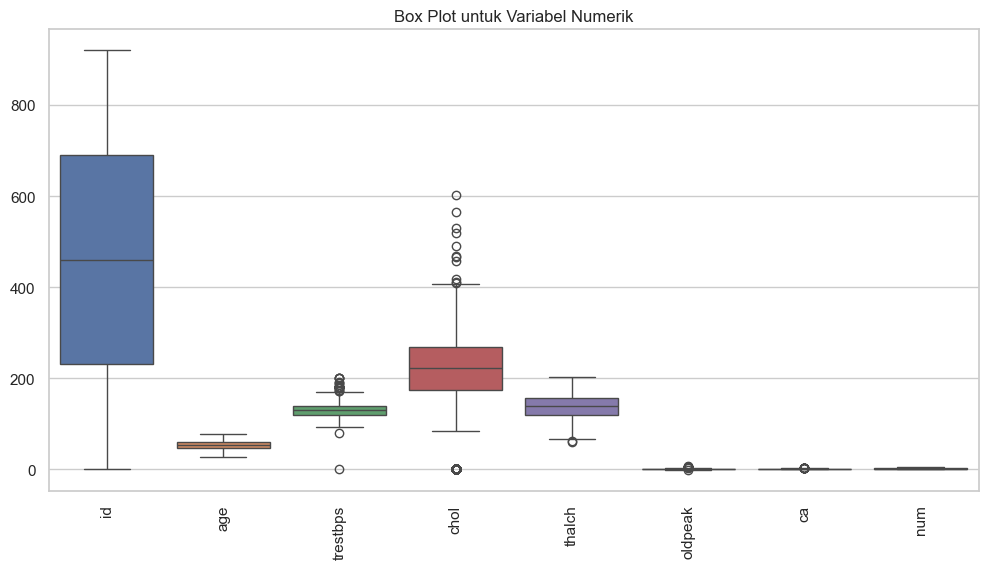

In [105]:

# Identifikasi outliers menggunakan box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))  # Hanya untuk kolom numerik
plt.xticks(rotation=90)
plt.title('Box Plot untuk Variabel Numerik')
plt.show()


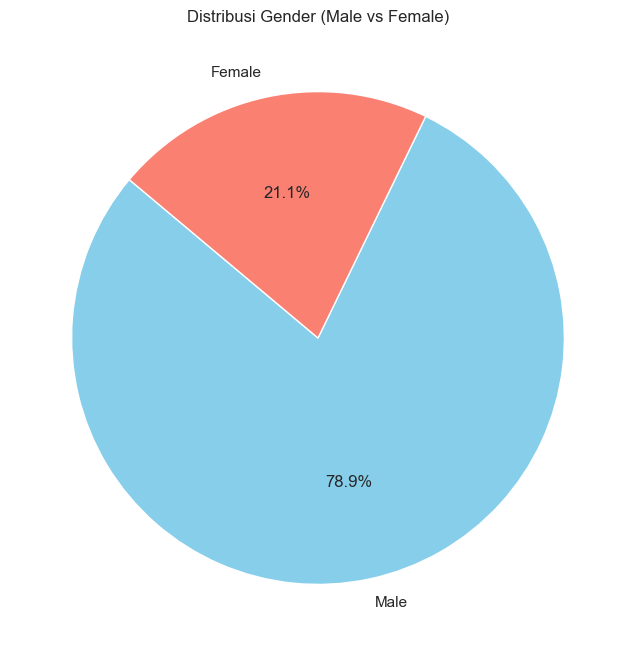

In [106]:
# Grafik pie untuk distribusi gender
plt.figure(figsize=(8, 8))
gender_counts = df['sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140)
plt.title('Distribusi Gender (Male vs Female)')
plt.show()

Histogram untuk setiap variabel numerik


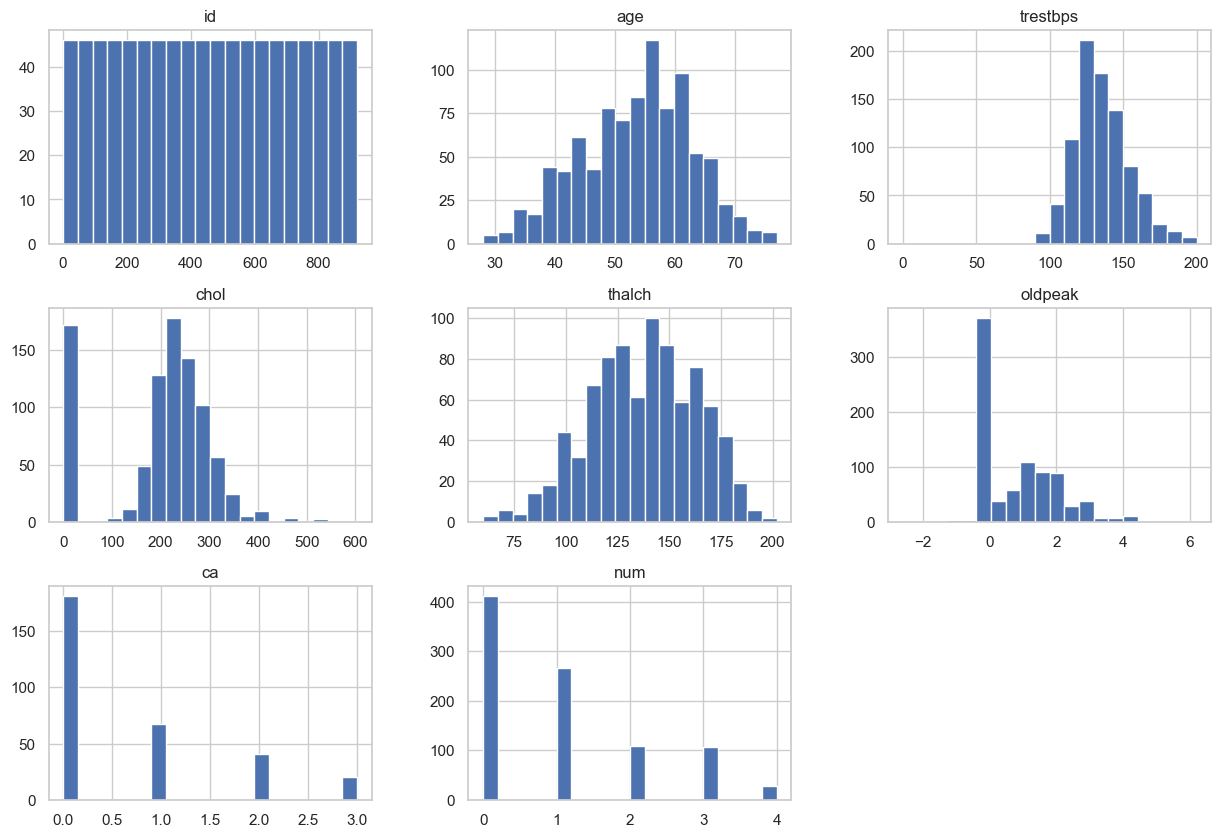

In [107]:
# Histogram untuk setiap variabel numerik

print("Histogram untuk setiap variabel numerik")
df.hist(bins=20, figsize=(15, 10))
plt.show()

In [108]:
# Menghapus outliers (jika diperlukan)
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df['chol'] < (Q1 - 1.5 * IQR)) | (df['chol'] > (Q3 + 1.5 * IQR)))]

In [109]:
# Hitung korelasi Pearson untuk semua variabel numerik
correlation_matrix = numeric_df_cleaned.select_dtypes(include=[np.number]).corr()

# Tampilkan hasil korelasi
print("\nMatriks Korelasi Antar Variabel Numerik:")
print(tabulate(correlation_matrix, headers='keys', tablefmt='fancy_grid'))


Matriks Korelasi Antar Variabel Numerik:
╒══════════╤═════════════╤═══════════╤════════════╤════════════╤════════════╤════════════╤═════════════╤════════════╕
│          │          id │       age │   trestbps │       chol │     thalch │    oldpeak │          ca │        num │
╞══════════╪═════════════╪═══════════╪════════════╪════════════╪════════════╪════════════╪═════════════╪════════════╡
│ id       │  1          │  0.204217 │  0.104937  │ -0.0204736 │ -0.428814  │  0.0664286 │  0.00409617 │  0.199007  │
├──────────┼─────────────┼───────────┼────────────┼────────────┼────────────┼────────────┼─────────────┼────────────┤
│ age      │  0.204217   │  1        │  0.249249  │  0.110621  │ -0.367645  │  0.278488  │  0.366965   │  0.382078  │
├──────────┼─────────────┼───────────┼────────────┼────────────┼────────────┼────────────┼─────────────┼────────────┤
│ trestbps │  0.104937   │  0.249249 │  1         │  0.122617  │ -0.118007  │  0.196717  │  0.0948381  │  0.179853  │
├──────────┼──

In [110]:
# Periksa dan hapus nilai missing setelah menangani outliers
numeric_df_cleaned = df_cleaned.dropna(subset=['chol'])

print(f'Jumlah baris setelah penanganan data missing: {numeric_df_cleaned.shape[0]}')

Jumlah baris setelah penanganan data missing: 707


In [111]:
# Statistik deskriptif
print("\nStatistik Deskriptif: \n")
print(tabulate(df.describe().reset_index(), headers='keys', tablefmt='grid'))


Statistik Deskriptif: 

+----+---------+---------+-----------+------------+---------+----------+------------+------------+------------+
|    | index   |      id |       age |   trestbps |    chol |   thalch |    oldpeak |         ca |        num |
+====+=========+=========+===========+============+=========+==========+============+============+============+
|  0 | count   | 920     | 920       |   861      | 890     | 865      | 858        | 309        | 920        |
+----+---------+---------+-----------+------------+---------+----------+------------+------------+------------+
|  1 | mean    | 460.5   |  53.5109  |   132.132  | 199.13  | 137.546  |   0.878788 |   0.676375 |   0.995652 |
+----+---------+---------+-----------+------------+---------+----------+------------+------------+------------+
|  2 | std     | 265.725 |   9.42469 |    19.0661 | 110.781 |  25.9263 |   1.09123  |   0.935653 |   1.14269  |
+----+---------+---------+-----------+------------+---------+----------+-------

In [113]:
print("\nStatistik Tambahan:")
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode().values[0]
        std_dev = df[col].std()
        variance = df[col].var()
        skewness = skew(df[col].dropna())
        kurt = kurtosis(df[col].dropna())
        
        print(f"\n{col}:")
        print(f"  Mean: {mean}")
        print(f"  Median: {median}")
        print(f"  Mode: {mode}")
        print(f"  Standar Deviasi: {std_dev}")
        print(f"  Variansi: {variance}")
        print(f"  Skewness: {skewness}")
        print(f"  Kurtosis: {kurt}")

numeric_df_cleaned = df_cleaned.dropna(subset=['chol'])


Statistik Tambahan:

id:
  Mean: 460.5
  Median: 460.5
  Mode: 1
  Standar Deviasi: 265.72542219366215
  Variansi: 70610.0
  Skewness: 0.0
  Kurtosis: -1.2000028355421026

age:
  Mean: 53.51086956521739
  Median: 54.0
  Mode: 54
  Standar Deviasi: 9.424685209576857
  Variansi: 88.82469129961677
  Skewness: -0.19567416156265732
  Kurtosis: -0.387366500445804

trestbps:
  Mean: 132.13240418118468
  Median: 130.0
  Mode: 120.0
  Standar Deviasi: 19.066069518587458
  Variansi: 363.51500688760973
  Skewness: 0.21296262682654535
  Kurtosis: 2.9345502153415817

chol:
  Mean: 199.13033707865168
  Median: 223.0
  Mode: 0.0
  Standar Deviasi: 110.78081035323044
  Variansi: 12272.387942518408
  Skewness: -0.6128010498060407
  Kurtosis: 0.05518938460200751

thalch:
  Mean: 137.5456647398844
  Median: 140.0
  Mode: 150.0
  Standar Deviasi: 25.926276492797612
  Variansi: 672.17181278099
  Skewness: -0.21075230265417338
  Kurtosis: -0.4838845484328895

oldpeak:
  Mean: 0.8787878787878788
  Median: 0

In [114]:
# Menghapus outliers (jika diperlukan)
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df['chol'] < (Q1 - 1.5 * IQR)) | (df['chol'] > (Q3 + 1.5 * IQR)))]


In [ ]:
# Tambahkan heatmap untuk korelasi antar variabel
plt.figure(figsize=(12, 10))
numeric_df_cleaned = df_cleaned.select_dtypes(include=[np.number])
correlation_matrix = numeric_df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

Koefisien Korelasi Pearson antara Age dan Cholesterol: 0.11


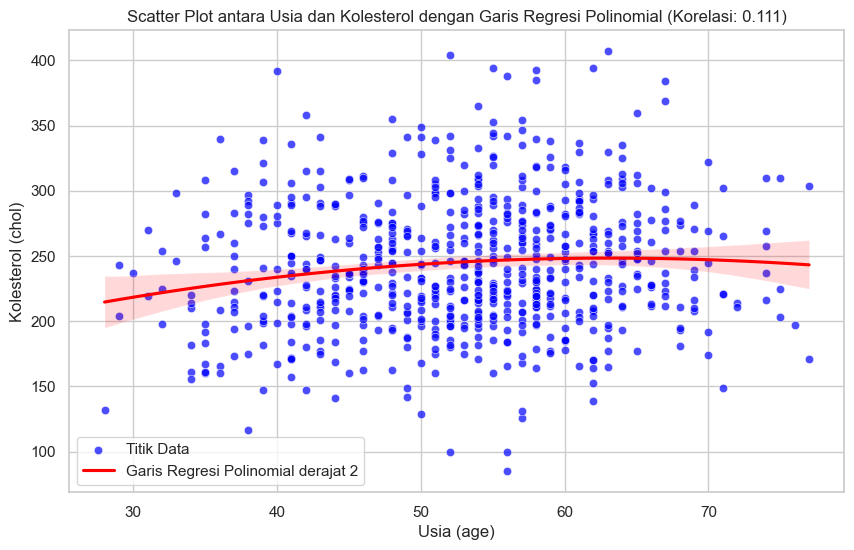

In [199]:
# Hitung korelasi Pearson antara age dan chol
if 'age' in numeric_df_cleaned.columns and 'chol' in numeric_df_cleaned.columns:
    correlation = numeric_df_cleaned[['age', 'chol']].corr().iloc[0, 1]
    print(f'Koefisien Korelasi Pearson antara Age dan Cholesterol: {correlation:.2f}')

    # Scatter Plot dengan garis regresi polinomial
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='age', y='chol', data=numeric_df_cleaned, color='blue', alpha=0.7, label='Titik Data')
    # Menambahkan garis regresi polinomial derajat 2
    sns.regplot(x='age', y='chol', data=numeric_df_cleaned, scatter=False, color='red', label='Garis Regresi Polinomial derajat 2', order=2)

    plt.xlabel('Usia (age)')
    plt.ylabel('Kolesterol (chol)')
    plt.title(f'Scatter Plot antara Usia dan Kolesterol dengan Garis Regresi Polinomial (Korelasi: {correlation:.3f})')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Kolom 'age' atau 'chol' tidak ditemukan dalam dataset.")

Koefisien Korelasi Pearson antara Age dan Resting Blood Pressure: 0.25


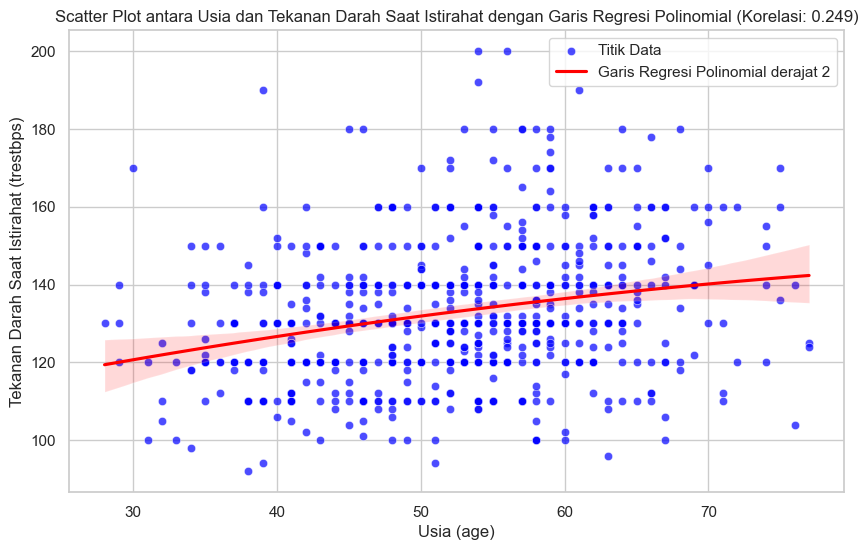

In [200]:

# Hitung korelasi Pearson antara age dan trestbps
if 'age' in numeric_df_cleaned.columns and 'trestbps' in numeric_df_cleaned.columns:
    correlation = numeric_df_cleaned[['age', 'trestbps']].corr().iloc[0, 1]
    print(f'Koefisien Korelasi Pearson antara Age dan Resting Blood Pressure: {correlation:.2f}')

    # Scatter Plot dengan garis regresi polinomial
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='age', y='trestbps', data=numeric_df_cleaned, color='blue', alpha=0.7, label='Titik Data')
    # Menambahkan garis regresi polinomial derajat 2
    sns.regplot(x='age', y='trestbps', data=numeric_df_cleaned, scatter=False, color='red', label='Garis Regresi Polinomial derajat 2', order=2)

    plt.xlabel('Usia (age)')
    plt.ylabel('Tekanan Darah Saat Istirahat (trestbps)')
    plt.title(f'Scatter Plot antara Usia dan Tekanan Darah Saat Istirahat dengan Garis Regresi Polinomial (Korelasi: {correlation:.3f})')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Kolom 'age' atau 'trestbps' tidak ditemukan dalam dataset.")


Koefisien Korelasi Pearson antara Cholesterol dan Thalach: -0.04


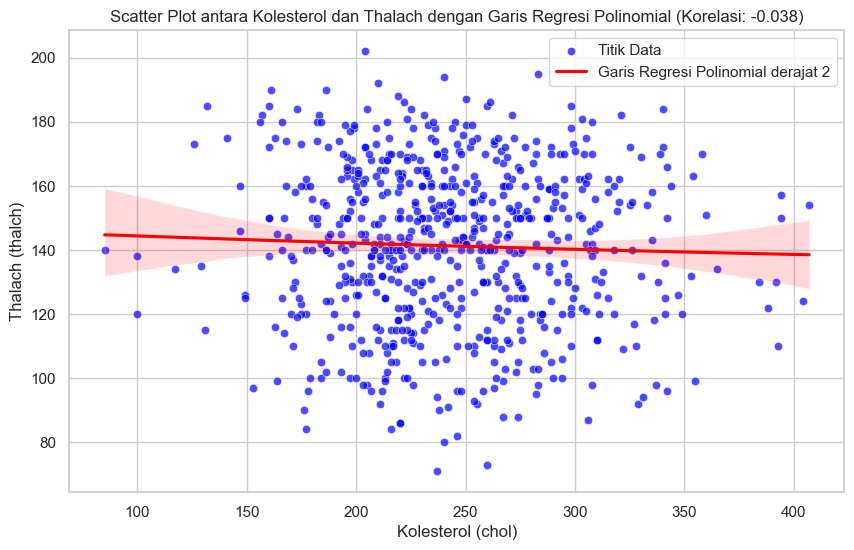

In [201]:

# Hitung korelasi Pearson antara chol dan thalch
if 'chol' in numeric_df_cleaned.columns and 'thalch' in numeric_df_cleaned.columns:
    correlation = numeric_df_cleaned[['chol', 'thalch']].corr().iloc[0, 1]
    print(f'Koefisien Korelasi Pearson antara Cholesterol dan Thalach: {correlation:.2f}')

    # Scatter Plot dengan garis regresi polinomial
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='chol', y='thalch', data=numeric_df_cleaned, color='blue', alpha=0.7, label='Titik Data')
    # Menambahkan garis regresi polinomial derajat 2
    sns.regplot(x='chol', y='thalch', data=numeric_df_cleaned, scatter=False, color='red', label='Garis Regresi Polinomial derajat 2', order=2)

    plt.xlabel('Kolesterol (chol)')
    plt.ylabel('Thalach (thalch)')
    plt.title(f'Scatter Plot antara Kolesterol dan Thalach dengan Garis Regresi Polinomial (Korelasi: {correlation:.3f})')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Kolom 'chol' atau 'thalch' tidak ditemukan dalam dataset.")


Koefisien Korelasi Pearson antara Tekanan Darah Saat Istirahat dan Thalach: -0.12


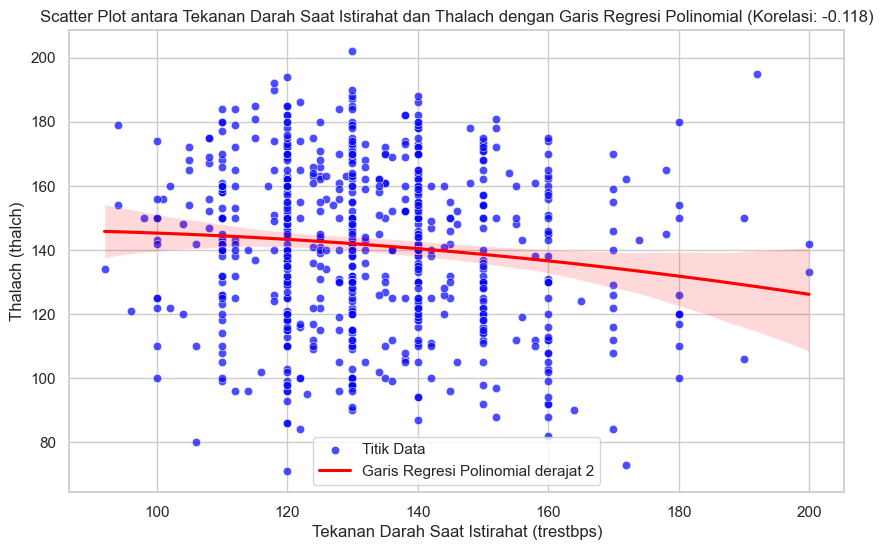

In [202]:

# Hitung korelasi Pearson antara trestbps dan thalch
if 'trestbps' in numeric_df_cleaned.columns and 'thalch' in numeric_df_cleaned.columns:
    correlation = numeric_df_cleaned[['trestbps', 'thalch']].corr().iloc[0, 1]
    print(f'Koefisien Korelasi Pearson antara Tekanan Darah Saat Istirahat dan Thalach: {correlation:.2f}')

    # Scatter Plot dengan garis regresi polinomial
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='trestbps', y='thalch', data=numeric_df_cleaned, color='blue', alpha=0.7, label='Titik Data')
    # Menambahkan garis regresi polinomial derajat 2
    sns.regplot(x='trestbps', y='thalch', data=numeric_df_cleaned, scatter=False, color='red', label='Garis Regresi Polinomial derajat 2', order=2)

    plt.xlabel('Tekanan Darah Saat Istirahat (trestbps)')
    plt.ylabel('Thalach (thalch)')
    plt.title(f'Scatter Plot antara Tekanan Darah Saat Istirahat dan Thalach dengan Garis Regresi Polinomial (Korelasi: {correlation:.3f})')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Kolom 'trestbps' atau 'thalch' tidak ditemukan dalam dataset.")


In [203]:
report = f"""
### Laporan Singkat Analisis Data Penyakit Jantung

1. Rangkuman Dataset:
- Sumber Data: Dataset ini diambil dari file CSV `heart_disease_uci.csv`.
- Deskripsi Data: Dataset berisi informasi tentang berbagai variabel numerik yang terkait dengan penyakit jantung.

2. Proses Analisis Data:

a. Pembacaan dan mengimport Data:
- import data dengan pandas
- Membaca Data:Data dimuat dari file CSV menggunakan `pd.read_csv()`.
- Tampilan Data: Lima baris pertama dan terakhir dari dataset ditampilkan untuk memberikan gambaran awal tentang isi data.
- Informasi Dataset: Informasi detail tentang tipe data dan jumlah nilai yang hilang diperiksa menggunakan `df.info()`.

b. mengidentifikasi nilai missing :
- mengeceknya dengan cara `df.isnull().sum()`

c. Identifikasi dan Penanganan Outliers:
- Box Plot Variabel Numerik:Box plot dari semua variabel numerik digunakan untuk mengidentifikasi adanya outliers dalam dataset.
- Grafik Pie Distribusi Gender: Grafik pie menunjukkan distribusi gender dalam dataset, memudahkan pemahaman proporsi Male dan Female.

d. Pembersihan Data:
- Data Missing: Setelah penanganan outliers, baris dengan nilai yang hilang pada kolom `chol` juga dihapus.
- Jumlah Baris Tersisa: Jumlah baris yang tersisa setelah penanganan data missing dan outliers adalah {numeric_df_cleaned.shape[0]}.

e. Statistik Deskriptif:
- Statistik Deskriptif: meliputi rata-rata, median, deviasi standar, dan kuartil dihitung untuk variabel numerik menggunakan `df.describe()`.

f. Analisis Korelasi:
- Korelasi Pearson: Koefisien korelasi Pearson antara:
 1. `age` (usia) dan `chol` (kolesterol) dihitung untuk menilai kekuatan hubungan linier antara kedua variabel. Korelasi yang dihitung adalah correlation:0.11
 2.  `age` dan `trestbps`  dihitung untuk menilai kekuatan hubungan linier antara kedua variabel. Korelasi yang dihitung adalah correlation:0.25
 3. chol dan thalch dihitung untuk menilai kekuatan hubungan linier antara kedua variabel. Korelasi yang dihitung adalah correlation:-0.04
 4. trestbps dan thalch dihitung untuk menilai kekuatan hubungan linier antara kedua variabel. Korelasi yang dihitung adalah correlation:-0.12
 
h. Visualisasi:
  - Heatmap Korelasi: Heatmap digunakan untuk menampilkan korelasi antar variabel dalam dataset secara visual.
  - Plot Scatter: Scatter plot menampilkan hubungan antara usia dan kolesterol.
  - Garis Regresi Polinomial: Garis regresi polinomial derajat 2 ditambahkan ke plot scatter untuk menggambarkan kemungkinan hubungan non-linier antara usia dan kolesterol.

3. Kesimpulan:
- Korelasi: Korelasi Pearson antara usia dan kolesterol menunjukkan nilai correlation:0.11, `age` dan `trestbps`  correlation:0.25, chol dan thalch  correlation:-0.04 ,  trestbps dan thalch  correlation:-0.12 
- Visualisasi Data: Heatmap korelasi memberikan gambaran umum tentang hubungan antar variabel dalam dataset, sementara scatter plot bersama garis regresi polinomial membantu dalam memahami hubungan antara usia dan kolesterol secara visual. Grafik pie memberikan gambaran distribusi gender dalam dataset.

"""


print(report)


### Laporan Singkat Analisis Data Penyakit Jantung

1. Rangkuman Dataset:
- Sumber Data: Dataset ini diambil dari file CSV `heart_disease_uci.csv`.
- Deskripsi Data: Dataset berisi informasi tentang berbagai variabel numerik yang terkait dengan penyakit jantung.

2. Proses Analisis Data:

a. Pembacaan dan mengimport Data:
- import data dengan pandas
- Membaca Data:Data dimuat dari file CSV menggunakan `pd.read_csv()`.
- Tampilan Data: Lima baris pertama dan terakhir dari dataset ditampilkan untuk memberikan gambaran awal tentang isi data.
- Informasi Dataset: Informasi detail tentang tipe data dan jumlah nilai yang hilang diperiksa menggunakan `df.info()`.

b. mengidentifikasi nilai missing :
- mengeceknya dengan cara `df.isnull().sum()`

c. Identifikasi dan Penanganan Outliers:
- Box Plot Variabel Numerik:Box plot dari semua variabel numerik digunakan untuk mengidentifikasi adanya outliers dalam dataset.
- Grafik Pie Distribusi Gender: Grafik pie menunjukkan distribusi gender dalam d